In [49]:
import cv2
import numpy as np

def extract_features(image):
    # Convert to different color spaces
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    
    # Calculate gradients
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gx = cv2.Sobel(gray, cv2.CV_32F, 1, 0, ksize=3)
    gy = cv2.Sobel(gray, cv2.CV_32F, 0, 1, ksize=3)
    grad_mag = np.sqrt(gx**2 + gy**2)
    grad_dir = np.arctan2(gy, gx)
    
    # Combine features
    features = np.concatenate([
        image,  # BGR
        hsv,    # HSV
        lab,    # LAB
        grad_mag[..., np.newaxis],  # Gradient magnitude
        grad_dir[..., np.newaxis],  # Gradient direction
    ], axis=2)
    
    return features

def create_pixel_features(image, mask):
    features = extract_features(image)
    X = features.reshape(-1, features.shape[2])
    mask = mask.reshape(-1,3)
    y = np.apply_along_axis(lambda x: x[0], 1, mask)
    
    return X, y

img = np.asarray(cv2.imread('Dataset-small/data/WildScenes/WildScenes2d/V-01/image/1623377790-818434554.png'))
mask = np.asarray(cv2.imread('Dataset-small/data/WildScenes/WildScenes2d/V-01/indexLabel/1623377790-818434554.png'))

from sklearn.ensemble import RandomForestClassifier

X, y = create_pixel_features(img, mask)
rf = RandomForestClassifier(n_estimators=3, random_state=42)
rf.fit(X, y)

img = np.asarray(cv2.imread('Dataset-small/data/WildScenes/WildScenes2d/V-01/image/1623377792-158486120.png'))
features = extract_features(img)
X = features.reshape(-1, features.shape[2])
y_pred = rf.predict(X).reshape(img.shape[:2])
print(y_pred)

[[ 8  8  8 ...  8  8  8]
 [ 8  8  8 ...  8  8  8]
 [ 8  8  8 ...  8  8  8]
 ...
 [ 8  8  8 ...  8  8  8]
 [18  8  8 ...  8  8  8]
 [18  8 18 ...  8  8  8]]
(1512, 2016)


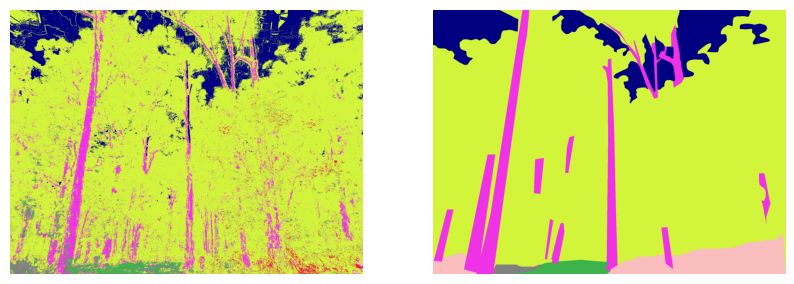

In [54]:
colours = [[0, 0, 0], 
           [75, 25, 230], 
           [75, 180, 60], 
           [25, 225, 255], 
           [200, 130, 0], 
           [180, 30, 145], 
           [240, 240, 70], 
           [230, 50, 240], 
           [60, 245, 210], 
           [75, 25, 230], 
           [128, 128, 0], 
           [40, 110, 170], 
           [200, 250, 255], 
           [0, 0, 128], 
           [195, 255, 170], 
           [0, 128, 128], 
           [190, 190, 250], 
           [128, 0, 0], 
           [128, 128, 128]]

result = np.array([[colours[num] for num in row] for row in y_pred])
actual = np.asarray(cv2.imread('Dataset-small/data/WildScenes/WildScenes2d/V-01/label/1623377792-158486120.png'))

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(cv2.cvtColor(result.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(cv2.cvtColor(actual, cv2.COLOR_BGR2RGB))
plt.show()


In [1]:
import pandas as pd

data = pd.read_csv('Dataset-small/data/WildScenes/WildScenes2d/V-01/poses2d.csv')
print(data.head)

<bound method NDFrame.head of                            timestamp x y z qw qx qy qz
0    2021-06-11 02:16:30.818434477 1623377790.81843...
1    2021-06-11 02:16:32.158486128 1623377792.15848...
2    2021-06-11 02:16:36.111739635 1623377796.11173...
3    2021-06-11 02:16:39.999188900 1623377799.99918...
4    2021-06-11 02:16:40.668195248 1623377800.66819...
..                                                 ...
738  2021-06-11 02:50:29.508641480 1623379829.50864...
739  2021-06-11 02:50:30.781623840 1623379830.78162...
740  2021-06-11 02:50:33.596470594 1623379833.59647...
741  2021-06-11 02:50:38.017682791 1623379838.01768...
742  2021-06-11 02:50:42.507349730 1623379842.50734...

[743 rows x 1 columns]>
